In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carregar o arquivo
df_colesterol = pd.read_csv('./datasets/colesterol.csv')
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
# Remover coluna ID
df_colesterol.drop(columns='Id', inplace=True)

In [6]:
# Renomear as colunas
df_colesterol.columns = (
  'grupo_sanguineo',
  'fumante',
  'nivel_atividade_fisica',
  'idade',
  'peso',
  'altura',
  'nivel_colesterol'
)

In [7]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [8]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

In [9]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [10]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [11]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [12]:
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [13]:
# Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [14]:
# Coletar medidas das variáveis categoricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()[0]
moda_fumante = df_colesterol_eda.fumante.mode()[0]
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_atividade_fisica.mode()[0]

In [15]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [16]:
# Imputar valores ausentes
df_colesterol_eda.fillna(value={
  'grupo_sanguineo': moda_grupo_sang,
  'fumante': moda_fumante,
  'nivel_atividade_fisica': moda_nivel_atividade_fisica,
  'idade': mediana_idade,
  'peso': mediana_peso,
  'altura': mediana_altura
  }, inplace=True)

df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   float64
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [17]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [18]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

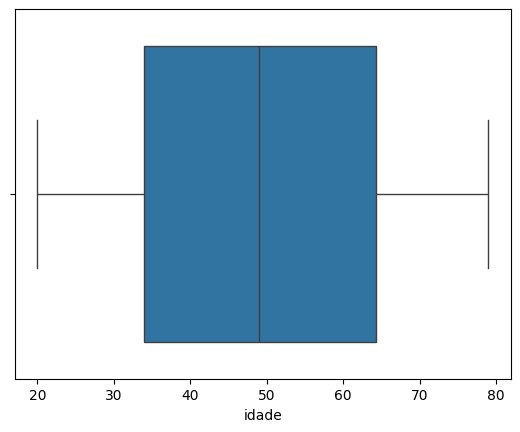

In [19]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

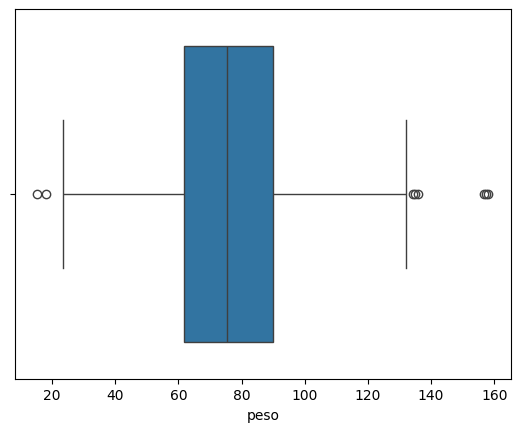

In [20]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='peso')

In [21]:
# Filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda.peso < 40].peso.count()

37

In [22]:
# Remover publico do Dataframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

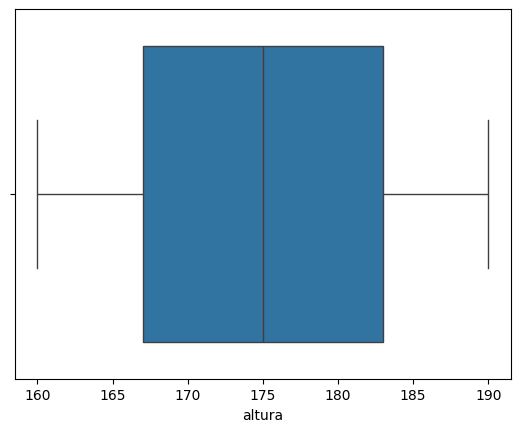

In [23]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

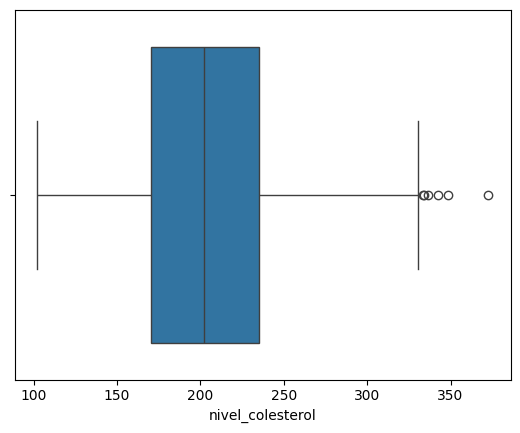

In [24]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

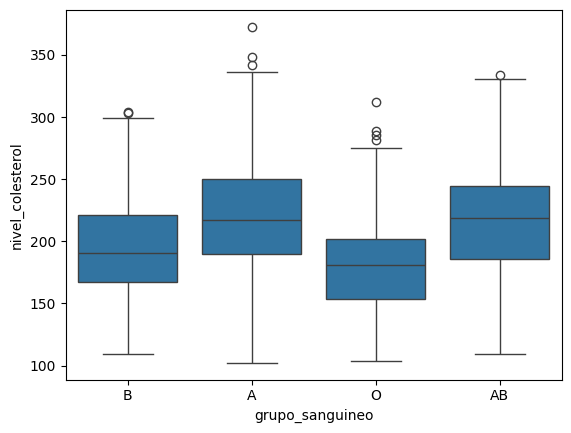

In [25]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

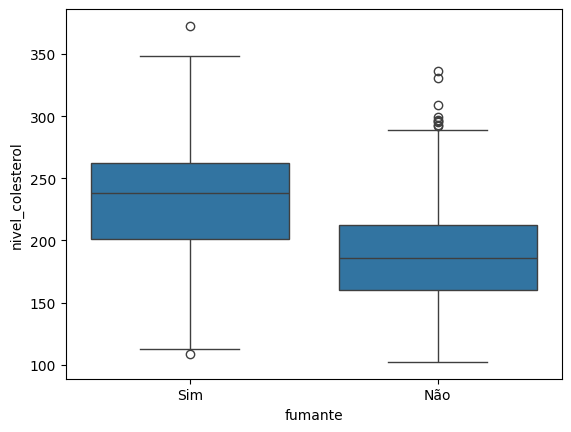

In [26]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

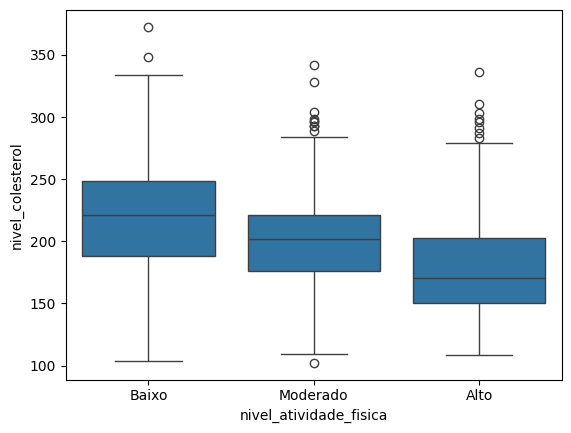

In [27]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

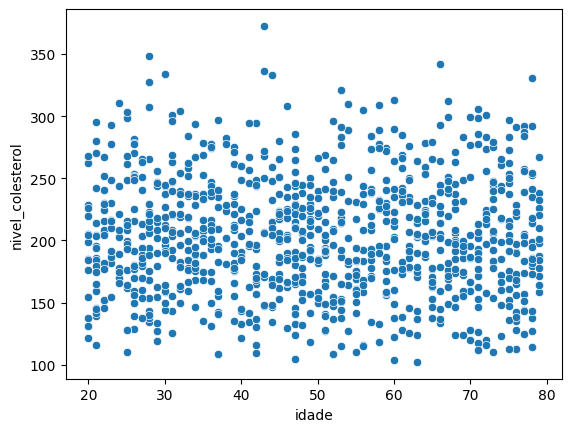

In [28]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

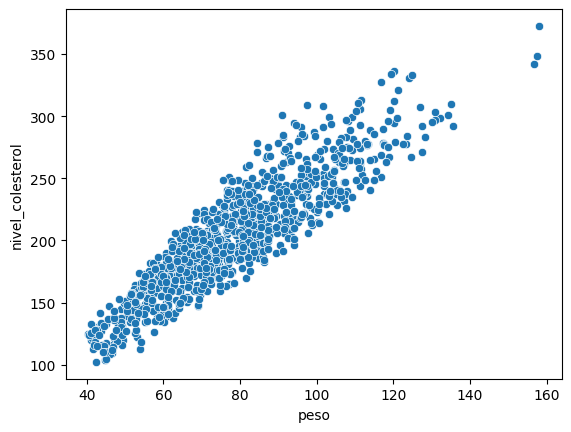

In [29]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

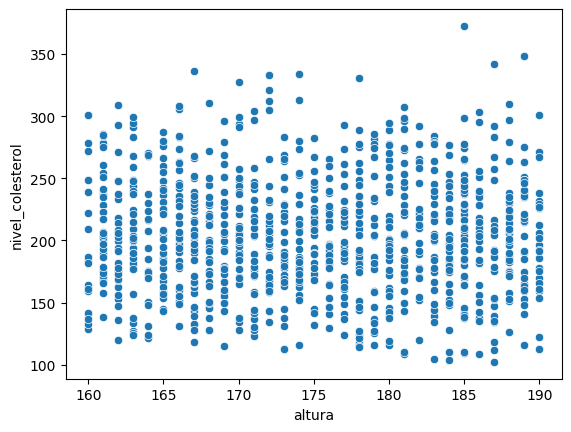

In [30]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

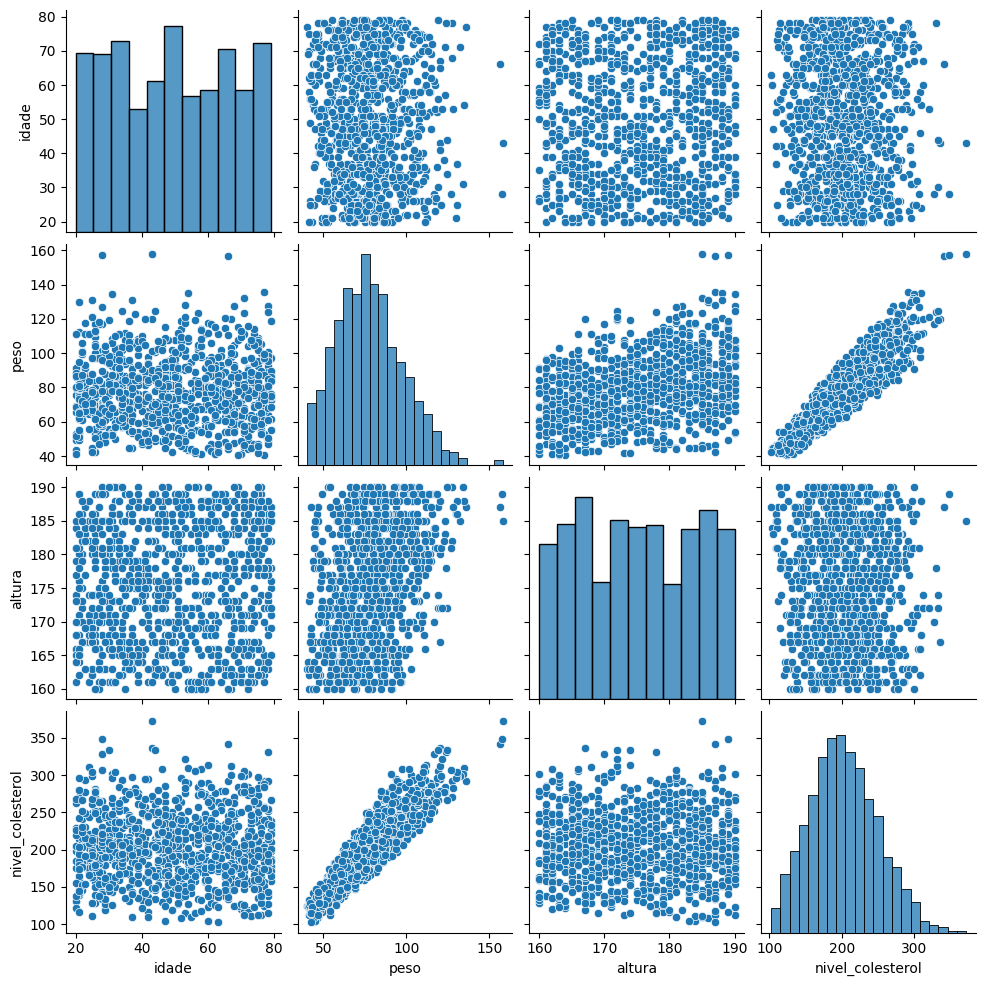

In [31]:
# Analise Gráfica Histograma
sns.pairplot(data=df_colesterol_eda)

In [32]:
# Análise de Correlação
# converter variaveis categoricas nominais em numericas, usando One-Hot Encoding do pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')
df_colesterol_eda.head(10)
# dummy variation trap - remover uma coluna de cada variavel categorica, mas pode não ser bom

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [33]:
# Converter variável categorica ordinal em numerica, usando factorize do pandas
df_colesterol_eda.nivel_atividade_fisica = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

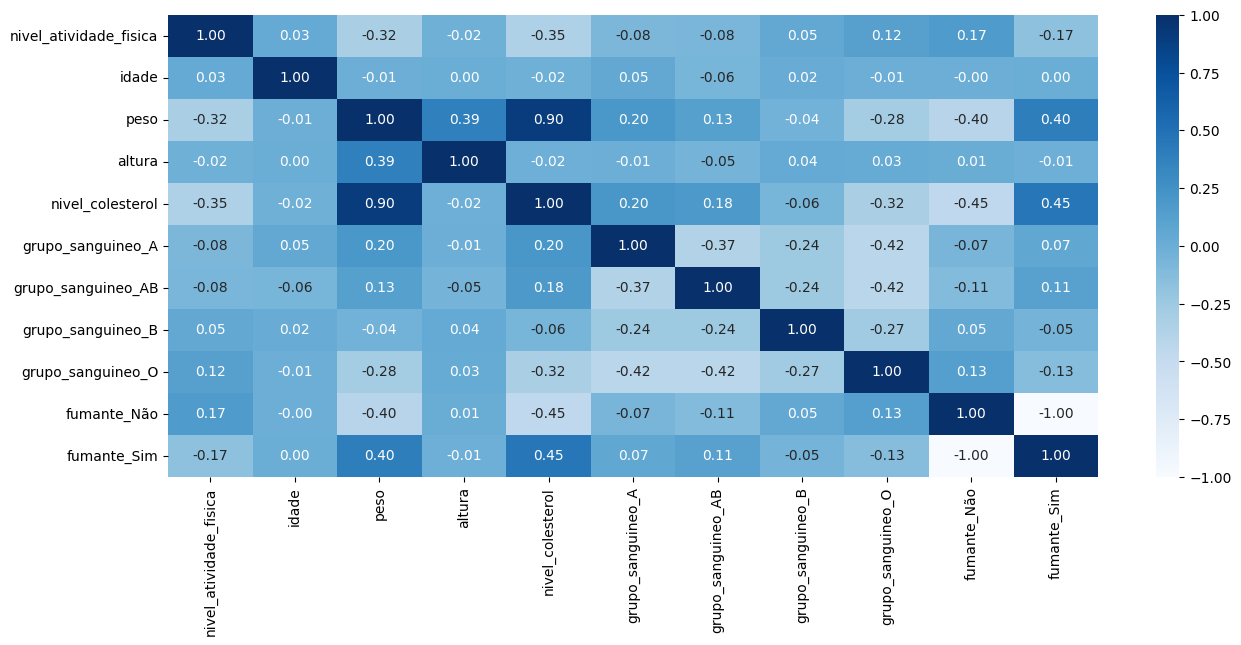

In [34]:
# Mapa de Calor com Correlação entre as variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), annot=True, fmt='.2f', cmap='Blues')

<Axes: >

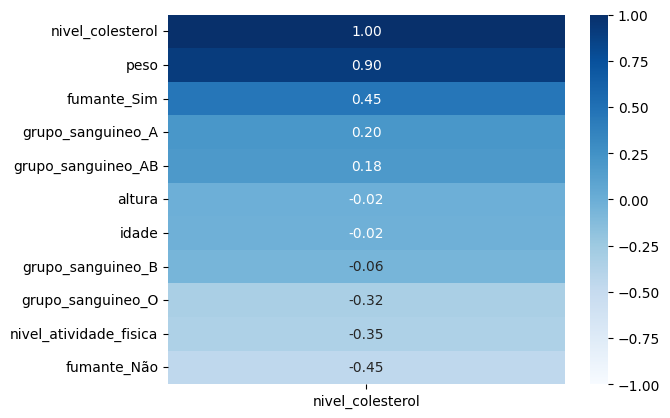

In [35]:
# Formato de Ranking, somente correlação com a variável target (nivel_colsterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Blues')

In [36]:
# Bucketing - Agrupamento de Dados em Faixas - Categorias numericas em categorias ordinais
# Idade 20 - 79
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x=df_colesterol_bucketing.idade, bins=bins_idade, labels=labels_idade, include_lowest=True)

In [37]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

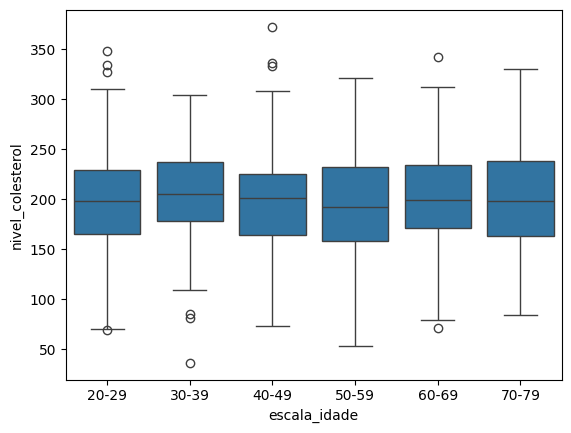

In [38]:
sns.boxplot(df_colesterol_bucketing,x="escala_idade", y="nivel_colesterol")

# Pipeline

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
# Criar Dataset de Treino e Teste
# Remover outliers
df_colesterol.drop(df_colesterol[df_colesterol.peso < 40].index, axis=0, inplace=True)
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [41]:
X = df_colesterol.drop(columns='nivel_colesterol', axis=1)
y = df_colesterol.nivel_colesterol

In [42]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)
X_test.shape, y_test.shape


((289, 6), (289,))

In [43]:
# Pipeline
# Imputar moda nas variáveis categóricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Padronizar variáveis numéricas - idade, peso, altura
# OneHotEncoding nas variáveis categóricas nominais - grupo_sanguineo, fumante
# OrdinalEncoding nas variáveis categóricas ordinais - nivel_atividade_fisica
# Imputar mediana nas variáveis numéricas - idade, peso, altura

# Nomes das Colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade','altura', 'peso']
colunas_ordinais = ['nivel_atividade_fisica']



In [44]:
# Transformer Categoricas
transformer_categoricas = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [46]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

In [47]:
# Criar um CollumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
  transformers=[
    ('num', transformer_numericas, colunas_numericas),
    ('cat', transformer_categoricas, colunas_categoricas),
    ('ord', transformer_ordinais, colunas_ordinais)
  ]
)

In [48]:
# Pipeline Principal = Preprocessador + Regressor
model_regr = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

In [49]:
# Treinar Modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

# Análise de Métricas

In [50]:
# Gerar Predição
y_pred = model_regr.predict(X_test)

In [51]:
# Calcular R2 Score
r2_score(y_test, y_pred)

0.9595439413362378

In [52]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

7.3014792387543235

In [53]:
# Calcular RMSE (Root Mean Squared Error)
mean_squared_error(y_test, y_pred, squared=False)

9.084313165912258

### Análise de Residuos

In [54]:
# Calcular residuos
residuos = y_test - y_pred

In [55]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

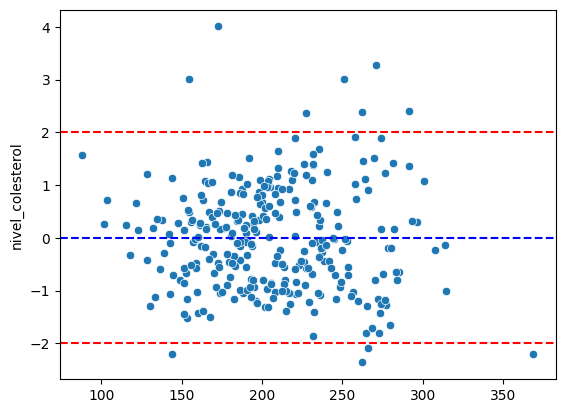

In [57]:
# Verificar linearidade dos residuos: Valores entre -2 e + 2
# Verificar homocedasticidade dos residuos: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_padronizados)
plt.axhline(y=0, color='blue', linestyle='--')
plt.axhline(y=-2, color='red', linestyle='--')
plt.axhline(y=2, color='red', linestyle='--')


Text(0, 0.5, 'Resíduos na escala padrão')

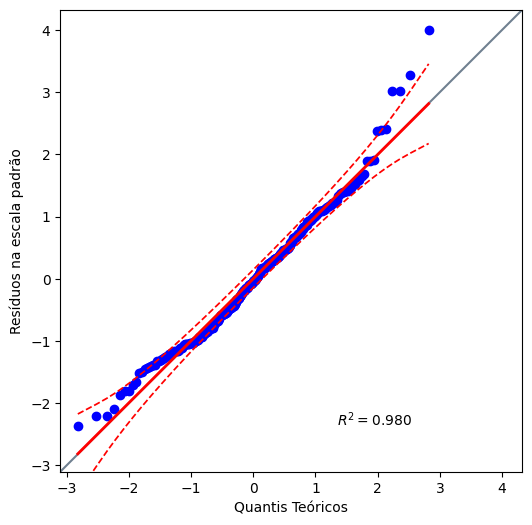

In [60]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(15, 6))
pg.qqplot(residuos, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

# Teste de Normalidade dos resíduos

In [61]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica de Teste Shapiro-Wilk: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))


Estatistica de Teste Shapiro-Wilk: 0.9806936979293823 e P-Value: 0.0006058853468857706


Podemos rejeitar a normalidade porque o P-Value é menor que 0.5

In [62]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatistica de Teste Kolmogorov-Smirnov: {} e P-Value: {}".format(stat_ks, p_value_ks))

Estatistica de Teste Kolmogorov-Smirnov: 0.42180184153541794 e P-Value: 3.9040394897149094e-47


Também podemos rejeitar a tese de normalidade para os resíduos

In [63]:
# Teste de Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatistica de Teste Lilliefors: {} e P-Value: {}".format(stat_lilliefors, p_value_lilliefors))

Estatistica de Teste Lilliefors: 0.04580153917219504 e P-Value: 0.20787449588436197


Segundo esse teste os resíduos seguem a distribuição normal

In [64]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_and = anderson(residuos, dist='norm')
stat_and, critical_and, significance_and

(0.9177628685772561,
 array([0.568, 0.647, 0.776, 0.906, 1.077]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [67]:
print("Estatistica de Teste Anderson: {} e Valor Crítico: {}".format(stat_and, critical_and[2]))

Estatistica de Teste Anderson: 0.9177628685772561 e Valor Crítico: 0.776


Como o valor critico é menor que o estatistico a distribuição dos resíduos não é normal

In [68]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[
  ('preprocessor', preprocessor)
])
X_test_transformed = pipe.fit_transform(X_test)
X_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]])

In [69]:
test_goldfeldquandt = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeldquandt = test_goldfeldquandt[0]
p_value_goldfeldquandt = test_goldfeldquandt[1]
print("Estatistica de Teste Goldfeld-Quandt: {} e P-Value: {}".format(stat_goldfeldquandt, p_value_goldfeldquandt))

Estatistica de Teste Goldfeld-Quandt: 0.6711130835242488 e P-Value: 0.9895155953692493


P-Value > 0.5 não podemos rejeitar H0 então existe homogeneidade nos resídos (normais)

# Predição de Valores

In [74]:
predicao_individual = {
  "grupo_sanguineo": "O",
  "fumante": "Não",
  "nivel_atividade_fisica": "Alto",
  "idade": 40,
  "peso": 70,
  "altura": 180
}
sample_df = pd.DataFrame(predicao_individual, index=[1])
sample_df


,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [76]:
# Predição
y_pred = model_regr.predict(sample_df)
y_pred

array([165.25])

In [77]:
import joblib
joblib.dump(model_regr, 'model_regr.pkl')

['model_regr.pkl']